In [1]:
import numpy as np
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot as plt

plt.style.use('ggplot')

In [2]:
import warnings; warnings.filterwarnings('ignore')

## Load Data

In [3]:
def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')

In [4]:
df_shampoo = read_csv('../shampoo-sales.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)

In [5]:
df_shampoo.head() # consists of 36 observations

Month
1901-01-01    266.0
1901-02-01    145.9
1901-03-01    183.1
1901-04-01    119.3
1901-05-01    180.3
Name: Sales, dtype: float64

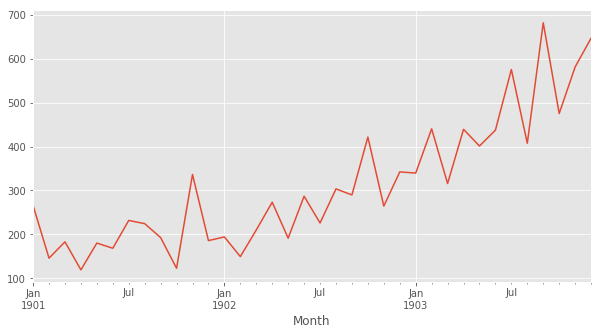

In [6]:
plt.figure(figsize=(10,5))
df_shampoo.plot()
plt.show()

## Detrend by Differencing

In [7]:
difference = list()
X = df_shampoo.values

for index in range(1, len(X)):
    # print(f'index: {index}, X: {X[index]}, X-1: {X[index-1]}')
    value = X[index] - X[index-1]
    difference.append(value)

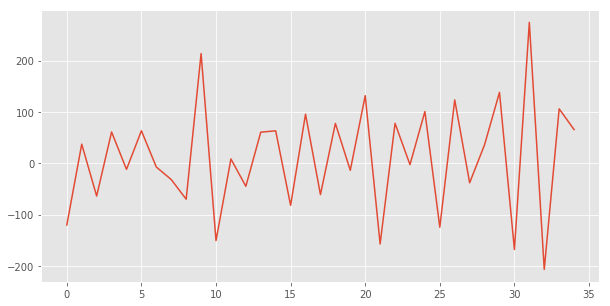

In [8]:
# plot the detrend time series
plt.figure(figsize=(10,5))
plt.plot(difference)
plt.show()

## Detrend by Model Fitting

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
X = [i for i in range(0, len(df_shampoo))]
X = np.reshape(X, (len(X), 1))
y = df_shampoo.values

In [11]:
model = LinearRegression()
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [12]:
# calculate trend
trend = model.predict(X)

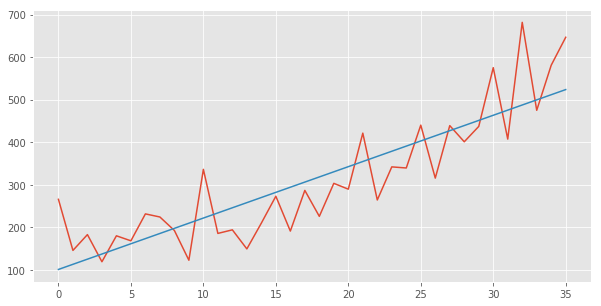

In [13]:
# plot the trend
plt.figure(figsize=(10,5))
plt.plot(y)
plt.plot(trend)
plt.show()

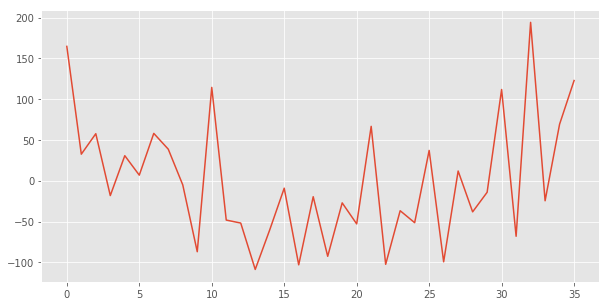

In [14]:
detrended = [y[i]-trend[i] for i in range(0, len(df_shampoo))]

# plot detrended
plt.figure(figsize=(10,5))
plt.plot(detrended)
plt.show()

---